# Exercise: NEISS, Question Set F

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- String replacement using regular expressions
- Using codebooks

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
df = pd.read_csv("nss15.tsv", sep="\t", error_bad_lines=False)
df.head()


b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [2]:
df.shape


(357727, 19)

### List the columns and their data types

In [3]:
df.dtypes


CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [4]:
# CPSC Case #  : Case Number
# trmt_date    : Date of Treatment
# psu          : 
# weight       : patient's weight
# stratum      : 
# age          : patient's age
# sex          : patient's gender
# race         : patient's race
# race_other   : record indicates more than one race or none of the 'race'
# diag         : diagnosis 
# diag_other   : none of the listed diagnoses in 'diag'
# body_part    : injured body part
# disposition  : code indicating the disposition of the case from the emergency department.
# location     : code for whereabouts of injuries
# fmv          : code for Smoke inhalation
# prod1        : The PC-NEISS program provides two 4-digit spaces for coding up to two products involved in an injury
# prod2        : record when there were two products involved in an injury
# narr1, narr2 : Comments/Narrative. Every case MUST include descriptive comments or remarks.
 

# Cleaning up a column

Take a look at the **race** column. How many rows of each race are there?

In [5]:
df['race'] #357727 rows
df['race'].unique() # 7 kinds of races


array([0, 1, 3, 2, 4, 5, 6])

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 28 of the column definitions file.

In [6]:
# df['sex'].unique()

In [7]:
# # save it back into the column
# df.sex = df.sex.replace(1, "Male")
# df.sex.replace(2, "Female", inplace = True)
# df.sex = df.sex.replace(3, "Not Recorded")
# df.head()

In [6]:
replacements = {
    0: 'Not Stated in ED record',
    1: 'White',
    2: 'Black/African American',
    3: 'Other',
    4: 'Asian',
    5: 'American Indian/Alaska Native',
    6: 'Native Hawaiian/Pacific Islander'
}

df.race.replace(replacements, inplace=True)
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,Not Stated in ED record,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,Not Stated in ED record,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,Not Stated in ED record,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 145813 White, 138666 not stated, and 48868 Black.

In [7]:
df.race.value_counts()
print(df[df.race == 'White'].race.value_counts()  )
print(df[df.race == 'Not Stated in ED record'].race.value_counts()  )
print(df[df.race == 'Black/African American'].race.value_counts()  )


White    145813
Name: race, dtype: int64
Not Stated in ED record    138666
Name: race, dtype: int64
Black/African American    48868
Name: race, dtype: int64


## Graph the number of each race, but don’t included the “Not Stated” records

In [8]:
%matplotlib inline


In [9]:
# df.race.value_counts().plot(kind = 'barh')


In [10]:
df[df.race != 'Not Stated in ED record'].race.value_counts()


White                               145813
Black/African American               48868
Other                                18884
Asian                                 4130
American Indian/Alaska Native         1000
Native Hawaiian/Pacific Islander       366
Name: race, dtype: int64

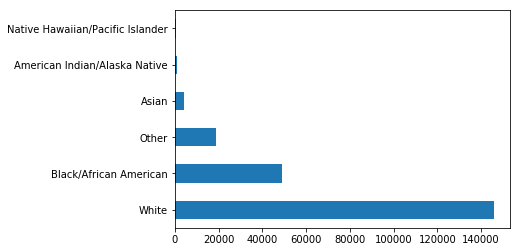

In [11]:
df[df.race != 'Not Stated in ED record'].race.value_counts().plot(kind = 'barh')


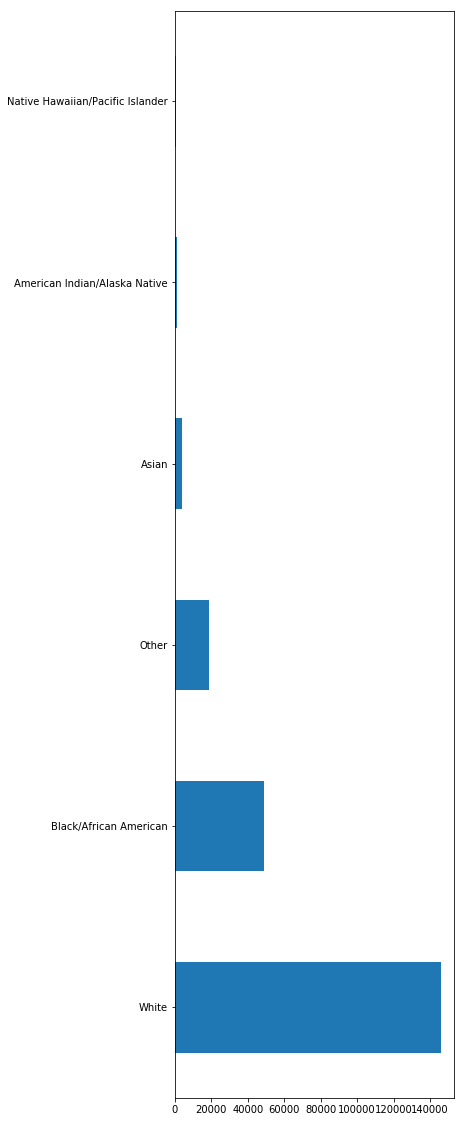

In [12]:
# changing plot size
df[df.race != 'Not Stated in ED record'].race.value_counts().plot(kind = 'barh', figsize=(5, 20))


## "Not Stated" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [13]:
import numpy as np
np.nan

nan

In [14]:
df.race.replace('Not Stated in ED record', np.nan, inplace = True) # don't write "NaN"
# df.race.replace('NaN', np.nan, inplace = True)
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,NaN,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,NaN,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,NaN,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [15]:
df.race.value_counts()


White                               145813
Black/African American               48868
Other                                18884
Asian                                 4130
American Indian/Alaska Native         1000
Native Hawaiian/Pacific Islander       366
Name: race, dtype: int64

In [16]:
df.race.value_counts(dropna=False)


White                               145813
NaN                                 138666
Black/African American               48868
Other                                18884
Asian                                 4130
American Indian/Alaska Native         1000
Native Hawaiian/Pacific Islander       366
Name: race, dtype: int64

## Graph the count of each race, but don’t included the “Not Stated” records

Yes, again! The code you use should be different this time.

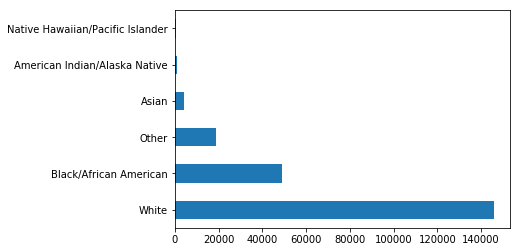

In [17]:
df.race.value_counts().plot(kind = 'barh')


## Graph the top 10 most popular products for injuries 

In [19]:
# df.groupby('race')['prod1'].


In [22]:
# df.prod1.value_counts().sort_values()


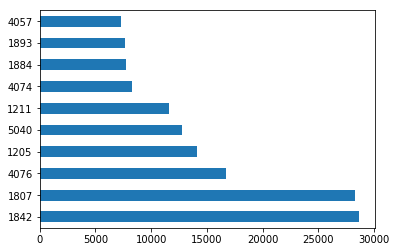

In [18]:
df.prod1.value_counts().head(10).plot(kind = 'barh')
# df.prod1.sort_values.value_counts().head(10).plot(kind = 'barh')


In [19]:
replacements = {
    4057: 'Alter',
    1893: 'Bathroom stall',
    1884: 'Ceilings',
    4074: 'Baby chairs or seats, other or not specified',
    1211: 'Football',
    5040: 'Bicycles',
    1205: 'Basketball',
    4076: 'Bedsprings',
    1807: 'Building materials, Floors or flooring materials',
    1842: 'Stairs'
}

df.prod1.replace(replacements, inplace=True)
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,NaN,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,NaN,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,NaN,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,Bathroom stall,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


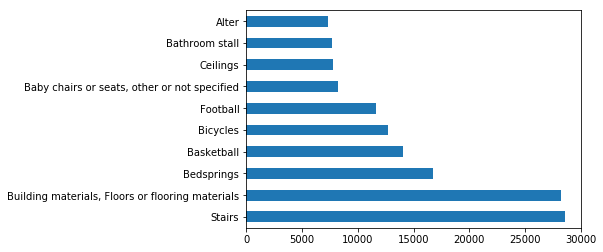

In [20]:
df.prod1.value_counts().head(10).plot(kind = 'barh')


In [ ]:
# #Find fell off bicycle, fall off bike, etc
# df[df.narr1.str.contains("F[AE]LL.*BI[CK]")]


# Cleaning up `race_other`

## `race_other` is a field for free-form race input. How many patients have a race of "HISPANIC"?

In [21]:
# df.race_other.value_counts()
df[df['race_other']=="HISPANIC"].shape[0]


14389

## What are the top 5 most popular "other" races?

In [22]:
df.race_other.value_counts().head()


HISPANIC        14389
MULTI-RACIAL     1727
UNKNOWN          1554
HISP             1334
NS                495
Name: race_other, dtype: int64

## Searching for multiracial patients

Wow, this data entry is terrible. “Multiracial” is spelled as **MULT RACIAL**, **MULTIPLE RACIAL**, and many more. How many different spellings can you find? **Use only one line to find the spellings.**

- Tip: Be sure to **ignore the na values**.
- Tip: You should probably find the multiracial-ish rows and then `value_counts` their `other_race`
- Tip: Maybe... ask me about .str.contains support for regular expressions?

In [23]:
df[df.race_other.str.contains(r"^MU.*", na=False)].race_other.value_counts()


MULTI-RACIAL       1727
MULTIRACIAL         146
MULTI                22
MULTI RACIAL         12
MULT RACIAL           1
MULTIPLE RACIAL       1
MULTRACIAL            1
MULTIRACAIL           1
Name: race_other, dtype: int64

## Replace all of those spellings with “MULTIRACIAL.”

Confirm that you’ve ended up with about 1900 MULTIRACIAL rows (yours might be anywhere between 1899-1910, depending on how many spellings you caught)

In [24]:
df.race_other.replace(('MULTI-RACIAL', 'MULTI', 'MULTI RACIAL', 'MULTIRACAIL', 'MULT RACIAL', 'MULTRACIAL', 'MULTIPLE RACIAL'), 'MULTIRACIAL', inplace = True)
df[df.race_other.str.contains(r"^MU.*", na=False)].race_other.value_counts()


MULTIRACIAL    1911
Name: race_other, dtype: int64

## Do the same thing with misspellings of "Unknown"

You should end up with around 1660-1670 UNKNOWN entries

In [25]:
df[df.race_other.str.contains(r"^U.*W", na=False)].race_other.value_counts()
# df[df.race_other.str.contains("u.*n", na=False)].race_other.value_counts()


UNKNOWN     1554
UKNOWN        14
UNKNKOWN       1
UNKNONW        1
UNKNOKWN       1
UNKNONWN       1
UNNOWN         1
UINKNOWN       1
UNKOWN         1
Name: race_other, dtype: int64

In [26]:
df.race_other.replace(('UNKNOWN', 'UNKN', 'UKNOWN', 'UNK', 'UNKNOKWN', 'UNKNONW', 'UNKNONWN','UNKOWN','UNKNKOWN','UNNOWN','UINKNOWN'), 'Unknown', inplace = True)
df[df.race_other.str.contains("^U.*", na=False)].race_other.value_counts()


# df.race.replace('Not Stated in ED record', np.nan, inplace = True)


Unknown      1682
UKRAINIAN       2
UKRANIAN        2
Name: race_other, dtype: int64

## What variations on HISPANIC can you find? Standardize them to HISPANIC.

In [27]:
df[df.race_other.str.contains("H.*C", na=False)].race_other.value_counts()


HISPANIC           14389
HISPNANIC              3
HISPANIC/LATINO        1
QRYOMHISPANIC          1
HISPPANIC              1
HISPNIC                1
HSIPANIC               1
HISPAINC               1
HISPAINIC              1
HISPAANIC              1
AMHARIC                1
HISPANIC S/P B         1
Name: race_other, dtype: int64

In [28]:
df.race_other.replace(('HISPNANIC', 'HISPPANIC', 'HISPNIC', 'HISPANIC/LATINO', 'HISPAINC', 'HISPANIC S/P B', 'HISPAANIC','HSIPANIC','HISPAINIC'), 'HISPANIC', inplace = True)


## Now try counting the number of hispanic people again.

In [29]:
df[df.race_other.str.contains("H.*C", na=False)].race_other.value_counts()


HISPANIC         14400
QRYOMHISPANIC        1
AMHARIC              1
Name: race_other, dtype: int64

## Seems like a lot! Update their race column to be ‘Hispanic’ instead of “Other”

You'll try to do this using skills you know, but pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [30]:
df.loc[df.race_other == 'HISPANIC', "race"] = "Hispanic"
df.race.value_counts(dropna=False)


White                               145131
NaN                                 138592
Black/African American               48848
Hispanic                             14400
Other                                 5270
Asian                                 4124
American Indian/Alaska Native          998
Native Hawaiian/Pacific Islander       364
Name: race, dtype: int64

## Graph the frequency of each race in the dataset

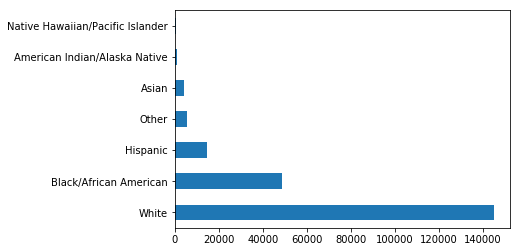

In [31]:
df.race.value_counts().plot(kind='barh')


## Find every injury involving unicycles.

In [32]:
# unicycle : 1283
df[df['prod1']==1283]


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
4171,150744255,06/23/2015,8,5.6748,C,12,2,White,NaN,57,NaN,33,1,0,0,1283,NaN,12YOF FELL OFF A UNICYCLE; FOREARM FX.,NaN
46499,150502967,04/22/2015,41,15.0591,V,62,1,NaN,NaN,57,NaN,33,4,9,0,1283,NaN,62YOM RIDING A UNICYCLE AT THE PARK AND FELL. ...,NaN
51052,150337697,03/15/2015,67,15.0591,V,9,2,NaN,NaN,71,ARM PAIN,33,1,8,0,1283,NaN,DX PN RT ARM 9YOF PATIENT WITH RT ARM PN SHE H...,FELL OFF UNICYCLE AT SCHOOL NOW WITH ARM PAIN RT
119639,151223619,12/08/2015,51,74.8813,L,56,1,Black/African American,NaN,71,PAIN,35,6,0,0,1283,1807.0,56 YO M PT WAS TRYING TO TEACH A COUPLE OF KID...,FELL BACKWARDS ONTO FLOOR C/O LEFT KNEE PAIN W...
180961,150919495,08/18/2015,93,15.7762,V,52,1,White,NaN,53,NaN,79,1,4,0,1283,NaN,52 YOM WAS UNICYCLING DOWN STREET WHEN HE WAS ...,AT LOW SPEED. DX: COCCYGEAL CONT.


## What is the racial breakdown of people involved in unicycle accidents?

I want a **percentage**, and I want that percentage to include unknowns/NaN values.

In [33]:
df[df['prod1']==1283].race.value_counts(dropna=False, normalize=True)*100


White                     40.0
NaN                       40.0
Black/African American    20.0
Name: race, dtype: float64

## How about injuries with toboggans?

Is the racial breakdown significantly different than the racial breakdown of all patients?

In [34]:
#  toboggan : 1273
df[df['prod1']==1273]
df[df['prod1']==1273].race.value_counts(dropna=False, normalize=True)*100


NaN         55.555556
White       33.333333
Hispanic    11.111111
Name: race, dtype: float64

## Find the top 5 most dangerous products

Just use the `prod1` column.

In [35]:
df['prod1'].value_counts().head()


Stairs                                              28609
Building materials, Floors or flooring materials    28255
Bedsprings                                          16707
Basketball                                          14095
Bicycles                                            12737
Name: prod1, dtype: int64

## Find the top 5 most dangerous products by race

This is that weird groupby thing that you can either memorize or cut and paste every time. If you ask I'll tell it to you and you won't have to search!

In [36]:
df.groupby('race')['prod1'].value_counts().groupby(level=0).head(5)


race                              prod1                                           
American Indian/Alaska Native     Building materials, Floors or flooring materials       92
                                  Stairs                                                 70
                                  Bicycles                                               58
                                  Bedsprings                                             52
                                  Basketball                                             31
Asian                             Stairs                                                310
                                  Building materials, Floors or flooring materials      253
                                  Bedsprings                                            219
                                  Basketball                                            203
                                  Bicycles                                              1